__<center>2º Deliverable: Machine Learning</center>__

__<center>Credit-card Recommendator system</center>__

<div>
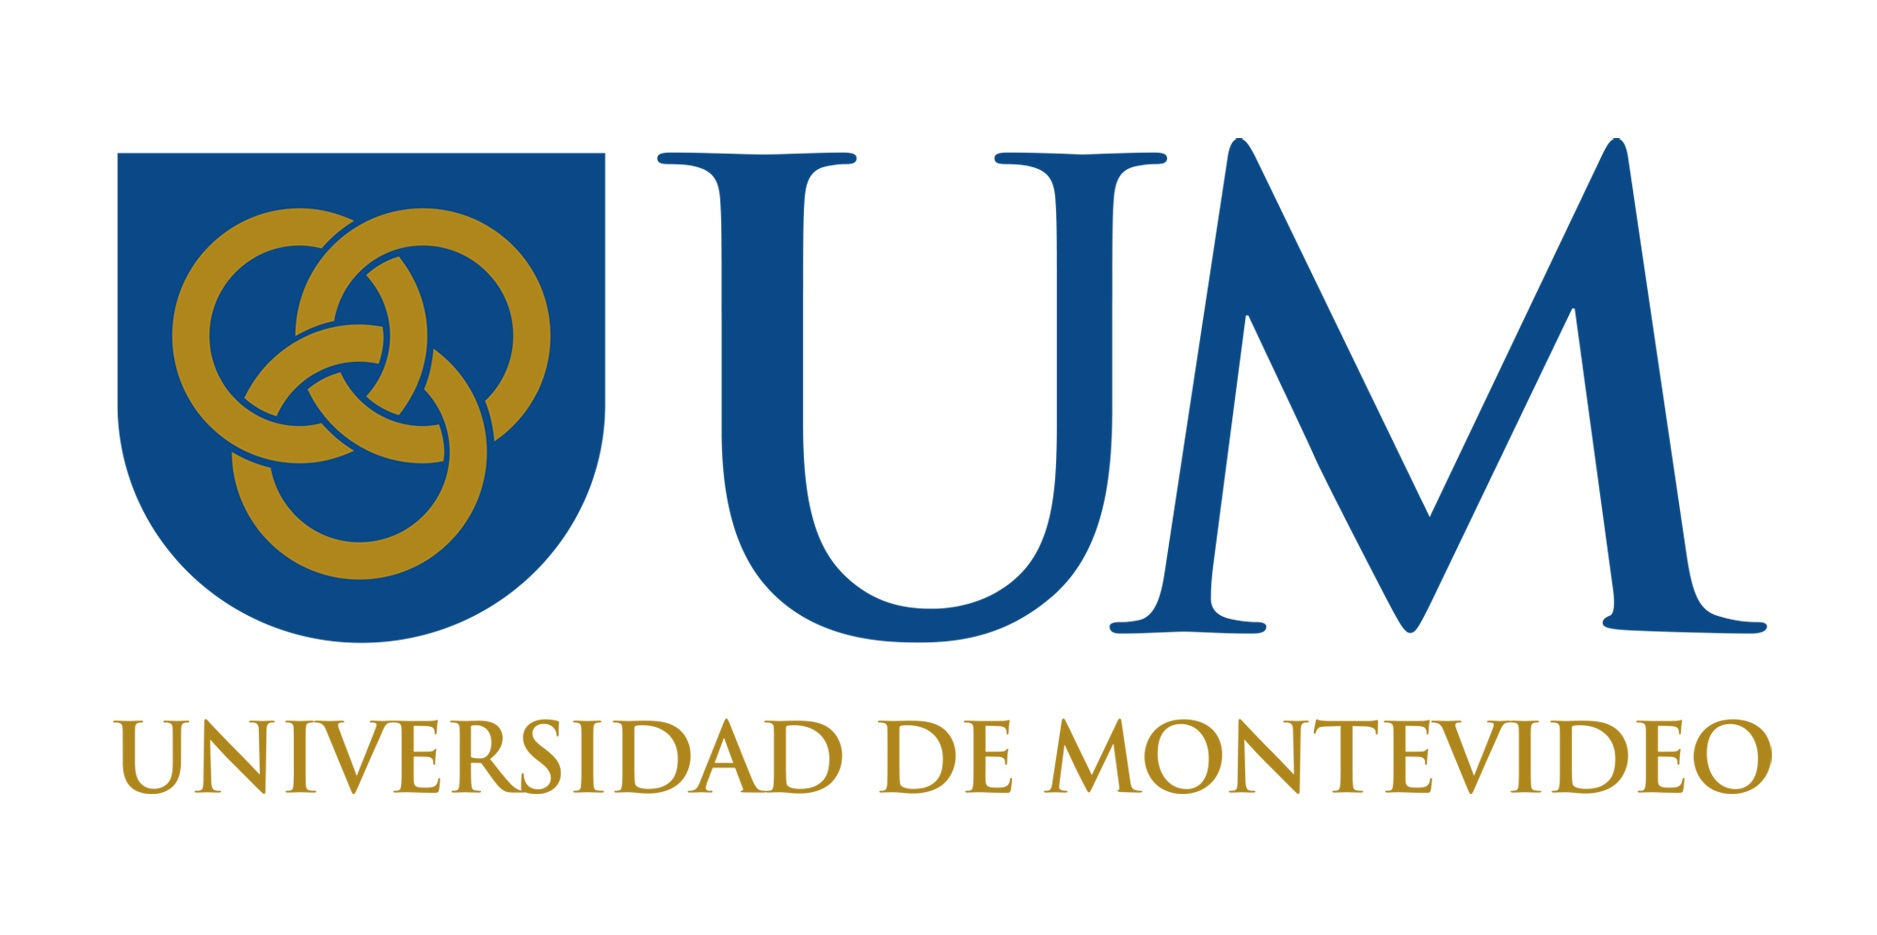
</div>


<center>Team VIII: Ariel Mordetzki and Mateo Stipaničić</center>
<center>Prof. Sebastián García Parra</center>
<center>17/10/2022</center>

___


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Task-outline" data-toc-modified-id="Task-outline-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Task outline</a></span></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data analysis</a></span><ul class="toc-item"><li><span><a href="#Import-libraries-and-dataset" data-toc-modified-id="Import-libraries-and-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import libraries and dataset</a></span></li><li><span><a href="#Data-exploration-and-understanding" data-toc-modified-id="Data-exploration-and-understanding-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data exploration and understanding</a></span><ul class="toc-item"><li><span><a href="#Overall-analysis-of-dataset" data-toc-modified-id="Overall-analysis-of-dataset-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Overall analysis of dataset</a></span></li><li><span><a href="#Feature-observation-as-feature-review" data-toc-modified-id="Feature-observation-as-feature-review-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Feature observation as feature review</a></span></li></ul></li><li><span><a href="#Principal-Component-Analysis-(PCA)" data-toc-modified-id="Principal-Component-Analysis-(PCA)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Principal Component Analysis (PCA)</a></span></li></ul></li><li><span><a href="#Clustering:-k-means" data-toc-modified-id="Clustering:-k-means-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clustering: <em>k-means</em></a></span><ul class="toc-item"><li><span><a href="#k-means-hiperparameter" data-toc-modified-id="k-means-hiperparameter-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><em>k-means</em> hiperparameter</a></span></li><li><span><a href="#k-means-implementation" data-toc-modified-id="k-means-implementation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><em>k-means</em> implementation</a></span><ul class="toc-item"><li><span><a href="#Cluster-visualization" data-toc-modified-id="Cluster-visualization-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Cluster visualization</a></span><ul class="toc-item"><li><span><a href="#Plotting" data-toc-modified-id="Plotting-3.2.1.1"><span class="toc-item-num">3.2.1.1&nbsp;&nbsp;</span>Plotting</a></span></li></ul></li></ul></li><li><span><a href="#k-means-clustering-results" data-toc-modified-id="k-means-clustering-results-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><em>k-means</em> clustering results</a></span></li></ul></li><li><span><a href="#Clustering:-DBSCAN" data-toc-modified-id="Clustering:-DBSCAN-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Clustering: <em>DBSCAN</em></a></span></li><li><span><a href="#Clustering:-Ward-method" data-toc-modified-id="Clustering:-Ward-method-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Clustering: <em>Ward method</em></a></span></li><li><span><a href="#Recommender-system" data-toc-modified-id="Recommender-system-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Recommender system</a></span></li><li><span><a href="#Questionnaire-&amp;-Predictive-model" data-toc-modified-id="Questionnaire-&amp;-Predictive-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Questionnaire &amp; Predictive model</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#Relevant-bibliography" data-toc-modified-id="Relevant-bibliography-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Relevant bibliography</a></span></li></ul></div>



___

# Task outline

The following is a commented code in Python that corresponds to UM's Machine Learning course.

> __Objectives__  The main idea is to group credit-card users into clusters, looking for common grounds between them in order to identify which product is most suitable for each client. 

> __Method__ As to reduce dimensionality in feature space we will take advantage from Principal Component Analysis. We compare and contrast different clustering algorithms (k-means, DBSCAN, Ward).


# Data analysis

> __In-depth analysis of given dataset__: In this section, we will analyze each feature's statistical properties, as well as the relevant relationships between them.


## Import libraries and dataset

In [1019]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import time

# Dataset
client_data = pd.read_csv('dataset-trxs.csv')
client_contact = pd.read_csv('dataset-contacts.csv')

We wondered whether we should merge the datasets into one (given that they share the link "CUSTID"). However, we prefer to keep them separated as the datasets answer to different purposes. We here suppose, for example, that the number of contacted calls will not influence the clustering (this would mean that a future PCA will discard it).

## Data exploration and understanding

> We will work __client_data__ since this will be the dataset that will train our models. The __client_contact__ dataset will just be used to determine if Commercial Dept. should offer the credit-card upon the clustering recommendator. 

_We understand that this situation is similar to Target's experience with ML models, that ended with social outrage (see https://www.forbes.com/sites/kashmirhill/2012/02/16/how-target-figured-out-a-teen-girl-was-pregnant-before-her-father-did/?sh=4a9c1a9b6668). The clustering method not only should be accurate, but also the business decision upon that clustering should be sound as well: this is the key use we will give to the second dataset._

### Overall analysis of dataset

In [1020]:
# Show dataset format with first sample wines
client_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


We assume _CUST_ID_ will not impact the clustering, treating it as an identificator. However, we are taking the risk of losing information (maybe, _CUST_ID_ is ordered historically, and there might be a link with the groupings). 

Nevertheless, we need to save the _CUST_ID_ values for future association with the second dataset.

In [1021]:
# Saving CUST_ID into dataframe and dropping CUST_ID from client_data
CUST_ID = pd.DataFrame(client_data['CUST_ID'],columns=['CUST_ID']) #used for later
client_data1 = client_data.drop('CUST_ID', axis=1)

In [1022]:
# New head
client_data1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [1023]:
# Print dataset size
client_data1.shape

(8950, 17)

The dataset is composed of 8950 samples, with 17 features that identify each client. This means __our feature space is 18-dimensional__.

In [1024]:
# Consider data type
client_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

All features are numerical, which eases data pre-processing: __there is no need for label encoders__.

Null value count needs further treatment.

In [1025]:
# Verify null values
client_data1.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We can see that there are plenty of NaN (null-values) in _minimum payments_ feature. We will overwrite this missing values with zero, since we assume that this means there was no minimum payment. However, credit limit will be overwritten with the median of the rest of the limits (since no credit limit is uncoherent).

In [1026]:
# Overwriting null-values (imputation)
client_data1['CREDIT_LIMIT'].fillna(client_data1['CREDIT_LIMIT'].median(), inplace = True)
client_data1['MINIMUM_PAYMENTS'].fillna(0, inplace = True)

# Printing new null values
client_data1.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [1027]:
# Break down dataset in percentiles
client_data1.describe(percentiles = [0.25, 0.50, 0.75])

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,833.983453,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2335.989918,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


We can use this table as to analyze __outliers__, which are data points that deviate more than three times the standard deviation from the mean. 

Using this definition, we can observe, comparing "max" with "mean" and looking at "std", which feature present outlier behaviour.

_Balance_ seems to show this kind of phenomenon: nevertheless, we will not consider these point as outliers since it is logical in business-sense that some clients have outlier behaviour in their bank balance (Paretto distribution). The same argument may be given for _installments purchase_, _one off purchases frequency_, _cash advance frequency_ and _cash advance trx_. 

We thus understand that _outliers_ are not really data samples to be withdrawn, rather, points that lay outside the mean, and thus they might conform a small cluster altogether. Outlier behaviour conforms to the nature of the problem and should be contemplated.

### Feature observation as feature review

> Our feature review will be brief since, in certain ways, PCA substitutes feature review (for example, there is no need to remove correlated features, that's exactly what PCA will do). It is done as to __gain a glimpse of what will PCA do__. We will not perform the feature processing (that is PCA's job), we will just observe feature relationships.

In [1028]:
# Presenting  relationships between variables
t1 = time.perf_counter()
# sns.pairplot(client_data1, diag_kind=None)
t2 = time.perf_counter()

In [1029]:
print(f'Plotting the correlation between variables takes: {t2-t1} seconds')

Plotting the correlation between variables takes: 3.220000053261174e-05 seconds


We aimed to determine whether certain features were correlated to others and then contrast it with future PCA results; however, the pairplot displays too much information to digest. We will rely entirely on PCA and its mathematical foundations; it is exactly in these cases where PCA is useful, since the dimensionality of the problem is so great that manual treatment of features is highly complex.

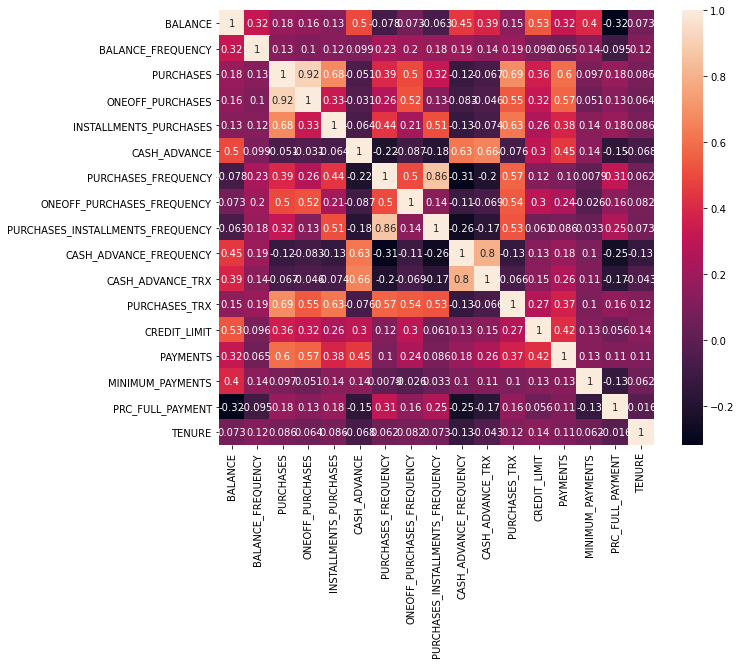

In [1030]:
# Plotting correlation matrix
f, ax = plt.subplots(figsize=(10, 8))
correlation = client_data1.corr()
sns.heatmap(correlation, mask=np.zeros_like(correlation, dtype=bool), square=True, ax=ax, annot=True)

We see that plenty of features correlate with each other: for example, frequencies relate strongly with their original feature (_CASH_ADVANCE_TRX_ and _CAS_ADVANCE_FREQUENCY_). __We thus expect a serious change in dimensionality from PCA__. 

## Principal Component Analysis (PCA)

> The need for PCA has been evidenced by the correlation between features and the great dimensionality of the problem. It is a great way to process data before clustering techniques due to the reduction in dimensions. 

Clustering models suffer what some call __"the curse of dimensionality"__, which is understood as the exponential increase in needed data quantity with the increase in dimensions, meaning, to produce a senseful model the required data volume increases exponentially with feature space.  

In [1031]:
# Regularization of features (normalization)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
client_data2 = pd.DataFrame(scaler.fit_transform(client_data1), columns = client_data1.columns)

# Data description after scaling
client_data2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.082154,0.877271,0.020457,0.014534,0.018270,0.020766,0.490351,0.202458,0.364437,0.090096,0.026413,0.041089,0.148390,0.034170,0.010915,0.153715,0.919553
std,0.109306,0.236904,0.043570,0.040722,0.040193,0.044491,0.401371,0.298336,0.397448,0.133414,0.055485,0.069435,0.121491,0.057078,0.030573,0.292499,0.223055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006736,0.888889,0.000808,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.002793,0.051753,0.007556,0.002134,0.000000,1.000000
50%,0.045864,1.000000,0.007367,0.000932,0.003956,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,0.019553,0.098497,0.016894,0.003791,0.000000,1.000000
75%,0.107868,1.000000,0.022637,0.014166,0.020828,0.023629,0.916667,0.300000,0.750000,0.148148,0.032520,0.047486,0.215359,0.037482,0.010323,0.142857,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Before the technique is applied, we need to normalize features into 0 to 1, as to evade unwanted tendencies to ponder certain variables only due to a bias in the features' magnitude/unit. 

_Note_: this is different to standarization, that transforms the variables' distribution to mean 0 and standard deviation 1. We want something else entirely: we want to retain each variable's distribution as this will imply the future dispersion of the clusters, but we need to compare "apples" with "apples" instead of "apples" and bananas. It is __as if__ we were translating everything into the same measurement unit.

Text(0, 0.5, 'Cumulative Explained Variance')

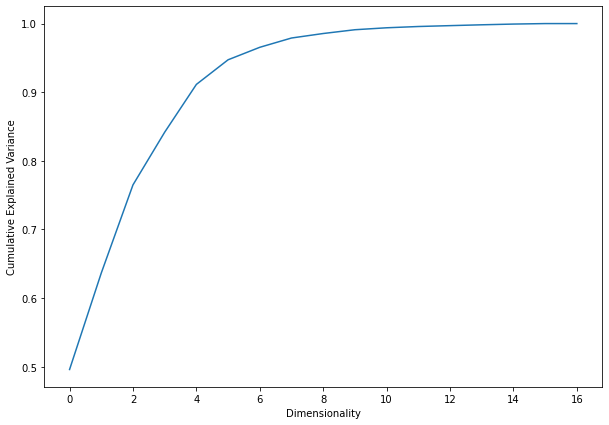

In [1032]:
# Initial Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(client_data2)
print()

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Dimensionality')
plt.ylabel('Cumulative Explained Variance')

We should prompt a discussion on which input to PCA should be given, meaning, which minimum of explained variance, maximum allowed relative error in the projections or the amount of dimensions we want. As to answer this question, we need to reflect upon the intentions of using PCA: we want to reduce dimensionality without losing information for a future clustering method. We are not looking for data visualization (situation in which we would require 2 or 3 dimensions), for example.

We believe the minimum explained variance approach is suitable.  6 components seems an appropriate dimensionality, given the fact that they explain more than 90% - 95% of variance, and the marginal increase when adding more components is too low. We lose too little information reducing 10 features.

In [1033]:
# Final PCA
n_components = 6
pca_final = PCA(n_components = n_components)
pca_final.fit(client_data2)
client_data3 = pd.DataFrame(pca_final.fit_transform(client_data2), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
client_data3.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.482169,-0.097652,-0.046483,-0.058264,0.110004,-0.171656
1,-0.608574,-0.019377,0.082093,-0.218775,-0.099000,0.137019
2,0.304508,0.920929,0.012281,0.160073,0.162312,-0.158516
3,-0.588625,-0.005651,0.037147,0.004508,0.223739,0.065238
4,-0.554357,0.052983,-0.084186,-0.132815,-0.017038,-0.204462


__We have now thus reduced our dataset into a 6-dimensional space.__

We do not know what does PC1 or PC2 represent, and neither we want to, since it can be a linear combination between the original features that does not have an explicit/direct business-wise sense (meaning, a variable that is not used as a metric in the business). We rely on the mathematics behind the PCA, that suggests that there are relationships between the previous variables that add unnecessary complexity to the problem.

Later on, we will undo the PCA as to understand which are the characteristics of each cluster in terms of variables.

# Clustering: _k-means_

The great problem with ___unsupervised machine learning___ is the lack of a target variable, from which we can infer the magnitude of the error in the model. Since the purpose of clustering is to _group data samples as to highlight meaningful patterns_, the industry relies on two metrics:
- Cluster cohesion: "distance" between points inside the cluster
- Cluster separation: "distance" between clusters

Of course, the whole concept of __distance__ requires a discussion. We will use _euclidean distance_ given the fact that dimensionality was seriously reduced. Moreover, will intra-cluster distance be the average, the maximum, the median? And will inter-cluster distance be measured through centroids, or minimum distance between samples?

## _k-means_ hiperparameter

One of the key discussions we will need to have when performing the k-means is the hiperparameter, meaning, the amount of clusters k-means will provide. __Which is the optimal number of clusters?__

A widely spread technique to determine the optimal number is the __elbow method__, given in class. 

In [ ]:
# Elbow method
from sklearn.cluster import KMeans
elbow_points = []
max_clusters = len(client_data3)
n_clust = [i+2 for i in range(10)]

for num in n_clust:
    kmeans = KMeans(n_clusters = num, random_state = 42)
    kmeans.fit(client_data3)
    elbow_points.append(kmeans.inertia_)

plt.plot(n_clust, elbow_points, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# hablar de que a partir de aca no se trabaja con inercia.

Initially, we attempted to run all possible cluster combinations (from 2 to 8950). This took too much time because we were trying to apply $8950$ instance of the k-mean algorithm. Heuristically, we suspected that the optimal number of clusters (in terms of cluster definition) had to be arround $4$, so we decided to run the elbow method with far fewer iterations.

> from the graph, we conclde that $n = 3$ could be a fairly good number of clusters, although the elbow is not as clear as one would expect.

## Clustering



In [ ]:
def nClusters(n, dataset, modelType):
    
    # DESCRIPTION: 
    # Function that clusterizes some dataset.
    
    # INPUTS:
    # n (int): Number of clusters
    # dataset (pd Dataframe): Clients dataset after a PCA for dimensionality reduction
    # modelType (str): string indicating the choice of model
    
    # OUTPUTS:
    # model (object): the sklearn model of kmeans already "trained", used for obtaining information
    # dataset (pd dataframe): the fitted dataset
    # clusters_df (pandas dataframe): the input dataframe but with cluster id aggregated
    # assign (pandas dataframe): the original first dataframe with original features, but with cluster id aggregated
    
    if modelType == 'kmeans':
        model = KMeans(n_clusters = n, random_state = 42) # max iters is set to 300 by default
        model.fit(dataset)

        # Assign a cluster id to the original df.
        clusters_df = pd.concat([client_data3, pd.Series(model.labels_)], axis = 1) # concatenate labels to pca df
        clusters_df.columns = np.concatenate((client_data3.columns.values, ['CLUSTER ID']), axis = 0) #add the "cluster id" columna
        clusters_df = pd.concat([CUST_ID, clusters_df], axis = 1) #add the "customer id" df at the begining.
        print(f'The model: {modelType} assigned theese values:')
        print(kmeans_clusters_df['CLUSTER ID'].value_counts())
        # Recovering previous features for discussion:
        assign = pd.concat([client_data, pd.Series(model.labels_)], axis = 1) # concatenate labels to pca df
        assign.columns  = np.concatenate((client_data.columns.values, ['CLUSTER ID']), axis = 0) #add the "cluster id" columna
        
        return model, clusters_df, assign, dataset

### Abstract cluster analisis

given a certain dataset after some clusterization, this function outputs a new dataframe with 

In [ ]:
def getMeansFromCluster(assigned_df, n_clusters):
    
    # DESCRIPTION:
    # function that outputs statistics of dataset with assigned cluster id after some clusterization
    
    # INPUTS:
    # assigned_df (pandas dataframe): dataframe containinng the original features before pca and a cluster id
    # n_clusters (int): number of clusters 
    
    # OUTPUTS:
    # statistics (pandas dataframe): dataframe containing the mean of every feature grouped by cluster
    

    balance = pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).BALANCE.mean())
    balance_frequency= pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).BALANCE_FREQUENCY.mean())
    purchases= pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).PURCHASES.mean())
    oneoff_purchases = pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).ONEOFF_PURCHASES.mean())
    installments_purchases = pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).INSTALLMENTS_PURCHASES.mean())
    cash_advance = pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).CASH_ADVANCE.mean())
    purchase_freq = pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).PURCHASES_FREQUENCY.mean())
    oneoff_purchase_freq = pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).ONEOFF_PURCHASES_FREQUENCY.mean()) 
    purchases_installments_freq = pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).PURCHASES_INSTALLMENTS_FREQUENCY.mean()) 
    cash_advance_freq = pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).CASH_ADVANCE_FREQUENCY.mean()) 
    cash_advance_trx = pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).CASH_ADVANCE_TRX.mean())
    purchases_trx = pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).PURCHASES_TRX.mean())
    credit_limit = pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).CREDIT_LIMIT.mean())
    payments = pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).PAYMENTS.mean())
    min_paiments = pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).MINIMUM_PAYMENTS.mean())
    pcr_full_paiments = pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).PRC_FULL_PAYMENT.mean()) 
    tenure = pd.DataFrame(assigned_df.groupby(['CLUSTER ID']).TENURE.mean()) 

    statistics = pd.concat([pd.Series([i for i in range(n_clusters)]),balance,balance_frequency, purchases, oneoff_purchases, installments_purchases,cash_advance,purchase_freq,oneoff_purchase_freq,purchases_installments_freq,cash_advance_freq,cash_advance_trx,credit_limit,payments,min_paiments,pcr_full_paiments,tenure], axis=1)
    statistics = statistics.rename(columns = {0:'CLUSTER ID'}) #correct the number of cluster id column
    return statistics
   

    

### Cluster visualization
We run a second PCA on the dataframe used for clustering. This is done in order to correctly get the 2 principal components of the 6-dimensional cluster, in order to plot them in a 2 dimensional space. 

At first, we wanted to plot the main two dimensions of the first PCA (meaning, plot PC1 versus PC2). Nevertheless, methodologically, a more proper step could be the one we will follow:
1. First PCA as to reduce dimensionality.
2. Clustering technique.
3. Second PCA for data visualization.


---
At this point, we have $3$ distinct dataframes: (DONDE PONEMOS ESTO?)

* _kmeans_clusters_df_: which is a dataframe containing the information about
    customer ID, the 6 principal components of the original dataset (used for kmeans) and its clusters.
* _kmeans_assign_: which is a dataframe containig the original information about customer id, and its clusters, used to interpret the result of kmeans.

* _visualization_: which has the 2 principal components of the "kmeans_clusters_df", __used ONLY for plotting__

The value count of clusters for each of theese dfs should be the same:

we define a function that plots the dataset 


In [ ]:
def plotNdimensions(n,n_clusters, dataset, model, model_type): 
    
    # DESCRIPTION:
    # Function that given a fitted dataset, plots the clustering result
    # in order to do this, we perform a PCA to reduce dimensionality.
    
    # INPUTS:
    # n (int): number of dimensions to plot (number of components of visualization PCA)
    # dataset (sklearn object): ALREADY fitted dataset of 6 components
    # model (sklearn object): model type, only used to get labels for plot
    # model_type (str): string indicating the model type, only used for fancy automatic titles
    
    # OUTPUTS:
    # No outputs
    
    plt.rcParams['figure.figsize'] = [10, 7]
    
    # pca to lower dimension to n
    n_components = n
    pca_final = PCA(n_components = n_components)
    pca_final.fit(dataset)  
    
    # aux df for plotting
    visualization = pd.DataFrame(pca_final.fit_transform(dataset), columns = [str(i) for i in range(n)])
    visualization = pd.concat([visualization, pd.Series(model.labels_)], axis = 1) # add the labels
    visualization.columns = np.concatenate(([str(i+1) for i in range(n)],['CLUSTER ID']), axis = 0)   
    
    if n == 3:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        x = visualization['1'].values.astype(float)
        y = visualization['2'].values.astype(float)
        z = visualization['3'].values.astype(float)

        ax.scatter(xdata,ydata,zdata, c=visualization["CLUSTER ID"], s=40) #, cmap="RdBu")
        
        plt.title(f'3D visualization for: {n_clusters} clusters, using: {model_type} clustering')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_zticklabels([])
        
        ax.set_xlabel('PC1', fontweight ='bold')
        ax.set_ylabel('PC2', fontweight ='bold')
        ax.set_zlabel('PC3', fontweight ='bold')
      
        plt.show()
    
    elif n == 2:
        
        sns.scatterplot(x='1',y='2',hue='CLUSTER ID',legend='full',data=visualization).set(title=f'2d visualization for: {n_clusters} clusters, using: {model_type} clustering')

    else:
        print("the human brain can only interpret 2 or 3 dimensions")

## Kmeans with 3 clusters:

In [ ]:
n_clusters = 3
model_type = 'kmeans'
model_kmeans, kmeans_clusters_df, kmeans_assign3, clients_data3 = nClusters(n_clusters, client_data3, model_type)


In [ ]:
# Analizando el resultado de kmeans con sus componentes principales (no sirve tanto)
kmeans_clusters_df.head()

In [ ]:
# analizandoe l resultado de kmeans con sus asignaciones (sirve)
kmeans_assign3.head()

In [ ]:
# analizando las estadísticas de kmeans:
getMeansFromCluster(kmeans_assign3, n_clusters)

In [ ]:
# 2d plot of the clustering from kmeans:
dimensions = 2
plotNdimensions(dimensions, n_clusters, clients_data3,model_kmeans, model_type)

In [ ]:
# 3d plot of the clustering from kmeans:
dimensions = 3
plotNdimensions(dimensions, n_clusters, clients_data3,model_kmeans, model_type)

### Kmeans with 4 clusters


In [ ]:
n_clusters = 4
model_type = 'kmeans'
model_kmeans, kmeans_clusters_df, kmeans_assign4, clients_data3 = nClusters(n_clusters, client_data3, model_type)

# acordarse que clients_data3 se esta sobrescribiendo todo el tiempo (porque le vamos haciendo un fit)
# No creo que sea un problema... el obligatorio es "academico" no tiene sentido ir definiendo varialbes


In [ ]:
# Analizando el resultado de kmeans con sus componentes principales (no sirve tanto)
kmeans_clusters_df.head()



In [ ]:
# analizandoe el resultado de kmeans con sus asignaciones (sirve)
kmeans_assign4.head()

In [ ]:
# analizando las estadísticas de kmeans con 4 clusters:
getMeansFromCluster(kmeans_assign4, n_clusters)

In [ ]:
# 2d plot of the clustering from kmeans:
dimensions = 2
plotNdimensions(dimensions, n_clusters, clients_data3,model_kmeans, model_type)


In [ ]:
# 3d plot of the clustering from kmeans:
dimensions = 3
plotNdimensions(dimensions, n_clusters, clients_data3,model_kmeans, model_type)

### Discussion from kmeans:
Nos quedamos con 3 o 4 clusters?

** FINAL VEREDICT: yo opino 3

* cluster 0 contains clients that PATRONES, thus, les ofrecemos la platinum
* cluster 1 containts clients that PATRONES, thus...
* y asi seguimos

In [ ]:
def plat_credit_nocall(dataset, contact_dataset):
    # funcion que recorre el dataset con cluster id, se fija si el cliente recibio muchas llaamadas
    # y retorna una lista de llamados para platinum, la otra, y una lista de gente que no se llama
    
    platinum_dataset = 0 #de la forma clientId, number
    la_otra_que_no_me_acuerdo = 0 #de la forma clientId, number
    return 0



# Clustering: _DBSCAN_

# Clustering: _Ward method_

# Recommender system

> Having considered the different clustering models, we now turn to the implementation of the clustering models into the business context. We will perform filterings to determine which are the best clients to contact

# Questionnaire & Predictive model

> Planning future stages, the bank requires the development of a questionnaire for new clients that can successfully identify which product can be offered to the future user, considering there is no associated transactional history.

# Conclusions

# Relevant bibliography

___General___
- https://iq.opengenus.org/standardization-regularization-vs-normalization/
- 

___Related repositories___
- https://github.com/Venkatadattak/credit-card-clustering-R-PYTHON-
- https://github.com/sshreyas999/Credit-Card-Clustering-PCA-Kmeans